# Project: Investigate a Dataset - TMDb-Movies

# Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

    Hello, for this dataset investigation I am going to use the TMDb-movies.csv dataset. I want to look into certain factors that can help me identify correlation or trends that help make a movie a box office hit. 


### Question(s) for Analysis
    I would like to aim and answer these questions with this dataset investigation:
        1. Which movie has the most budget? Did it translate to profits?
        2. Which movie has the most revenue? Did it translate to profits?
        3. Is there a certain actor/actress that is starring in profitable movies?
        4. Is there a certain director that has directed more profitable movies compared to others?
        5. How long should the movie be? Is the longest movie more profitable? 
        6. Is there a certain genre that outperforms the rest?
        7. Overall which movie earned the most?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


So here is our dataset. It has a lot of columns that we are not going to investigate, so I am going to drop those off to reduce the clutter in our dataset. 
    1. id, imdb_db, homepage, overview - these are too specific for the movies and these won't affect the outcome. 
    2. production companies - a lot of movies were made by big companies and I think it will skew the results towards the big 
       companies. 
    3. vote_count, vote_average - they differ from each movie so I dont think it's a good measure to include them also.
    4. popularity - I think it's too based on people's opinions. 
    5. bud_adj, revenue_adj - I am going to use the first 2 columns.

In [4]:
df.drop(['id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average'], axis=1, inplace=True)

In [5]:
df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


There much better. On to the next step.


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

First, I am going to check for duplicated data. 

In [6]:
sum(df.duplicated())

1

Since it's only 1, I will just drop it as it won't be significant enough to affect the results. 

In [7]:
df.drop_duplicates(inplace=True)

Let's check what we have so far.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 10 columns):
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
cast              10789 non-null object
director          10821 non-null object
tagline           8041 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
release_year      10865 non-null int64
dtypes: int64(4), object(6)
memory usage: 933.7+ KB


I will check the values in the columns and see if there are some that needs to be addressed. 

In [9]:
df['budget'].value_counts()

0            5696
20000000      190
15000000      183
25000000      178
10000000      176
30000000      164
5000000       141
40000000      134
35000000      128
12000000      120
50000000      112
6000000       109
8000000       102
3000000       101
60000000       99
7000000        92
4000000        84
2000000        81
18000000       74
1000000        73
70000000       66
11000000       65
45000000       64
80000000       62
13000000       59
17000000       59
14000000       56
22000000       54
3500000        52
75000000       51
             ... 
9100000         1
34200000        1
818418          1
14200000        1
8400000         1
22997992        1
7000            1
220000          1
23600000        1
1645000         1
82500000        1
27220000        1
5112027         1
75              1
1052753         1
225000          1
115             1
12000           1
163000000       1
2240000         1
786675          1
4250000         1
207000000       1
61733           1
19885552  

In [11]:
df['revenue'].value_counts()

0            6016
12000000       10
10000000        8
11000000        7
6000000         6
5000000         6
2000000         6
13000000        5
20000000        5
14000000        5
30000000        5
25000000        4
7000000         4
50000000        4
1000000         4
4300000         4
4000000         4
15              3
11              3
29000000        3
60000000        3
3               3
6700000         3
16              3
100000000       3
21000000        3
102000000       3
2500000         3
70000000        3
16000000        3
             ... 
42721196        1
79958599        1
40084041        1
442965          1
50752337        1
30857814        1
1400000         1
7027290         1
303788635       1
10300000        1
45916769        1
26049082        1
211989043       1
41009669        1
346079773       1
4729352         1
23159305        1
272742922       1
525             1
2626800         1
39946780        1
3117985         1
22270           1
65884703        1
4500000   

Hmm there a few 0's there. I am going to drop these rows as there is no such thing as a budget free movie or a movie that didn't even see a dollar in revenue!

In [12]:
df= df[df['budget'] != 0]

df= df[df['revenue'] != 0]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 10 columns):
budget            3854 non-null int64
revenue           3854 non-null int64
original_title    3854 non-null object
cast              3850 non-null object
director          3853 non-null object
tagline           3574 non-null object
runtime           3854 non-null int64
genres            3854 non-null object
release_date      3854 non-null object
release_year      3854 non-null int64
dtypes: int64(4), object(6)
memory usage: 331.2+ KB


So that leaves us with 3854, but we still need to check for null values and errors in the other columns.

In [14]:
sum(df['original_title'].isnull())

0

Ok, none in title.

In [15]:
sum(df['cast'].isnull())

4

In [16]:
sum(df['director'].isnull())

1

In [17]:
sum(df['runtime'].isnull())

0

Good that it's only a small number, I will just drop those off. 

In [18]:
df.dropna(axis=0, inplace=True)

Let's see what we have now.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3572 entries, 0 to 10848
Data columns (total 10 columns):
budget            3572 non-null int64
revenue           3572 non-null int64
original_title    3572 non-null object
cast              3572 non-null object
director          3572 non-null object
tagline           3572 non-null object
runtime           3572 non-null int64
genres            3572 non-null object
release_date      3572 non-null object
release_year      3572 non-null int64
dtypes: int64(4), object(6)
memory usage: 307.0+ KB


We got rid of the 0's and null values, next is I'm going to check for wrong data types and convert them if necessary.


In [20]:
df.dtypes

budget             int64
revenue            int64
original_title    object
cast              object
director          object
tagline           object
runtime            int64
genres            object
release_date      object
release_year       int64
dtype: object

I am going to convert the release date into datetime for convenience.

In [21]:
pd.to_datetime(df['release_date'])

0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
5       2015-12-25
6       2015-06-23
7       2015-09-30
8       2015-06-17
9       2015-06-09
10      2015-10-26
11      2015-02-04
12      2015-01-21
13      2015-07-16
14      2015-04-22
15      2015-12-25
16      2015-01-01
17      2015-07-14
18      2015-03-12
19      2015-11-18
20      2015-05-19
21      2015-06-15
22      2015-05-27
23      2015-02-11
24      2015-12-11
25      2015-07-23
26      2015-06-25
27      2015-01-24
28      2015-11-06
29      2015-09-09
           ...    
10665   2070-12-14
10683   2070-10-29
10689   2065-12-16
10690   2065-03-02
10691   2065-12-22
10692   2065-06-03
10724   2069-12-12
10725   2069-09-23
10727   2069-05-25
10728   2069-06-17
10755   1978-07-07
10756   1978-06-16
10757   1978-09-02
10758   1978-12-14
10759   1978-10-25
10760   1978-07-27
10762   1978-12-08
10770   1978-10-06
10771   1978-11-15
10775   1978-10-06
10779   1978-06-27
10780   1978

We are still missing one important column, the profits!

I am going to insert it using the budget and revenue columns, since revenue - budget = profits!!!


In [22]:
df.insert(0, 'profit', df['revenue']-df['budget'])

In [23]:
df.head()

,profit,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,1363528810,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,228436354,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,185238201,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,1868178225,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,1316249360,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


We need to prune our dataset a little bit more. I only want to see the box office hit movies. I am going to drop all the rows that didn't even make 100M in profits. 

In [24]:
df = df[df['profit'] >= 100000000]

In [25]:
df.head()

,profit,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,1363528810,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,228436354,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,185238201,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,1868178225,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,1316249360,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 10760
Data columns (total 11 columns):
profit            813 non-null int64
budget            813 non-null int64
revenue           813 non-null int64
original_title    813 non-null object
cast              813 non-null object
director          813 non-null object
tagline           813 non-null object
runtime           813 non-null int64
genres            813 non-null object
release_date      813 non-null object
release_year      813 non-null int64
dtypes: int64(5), object(6)
memory usage: 76.2+ KB


In [27]:
df.describe()

,profit,budget,revenue,runtime,release_year
count,8.130000e+02,8.130000e+02,8.130000e+02,813.000000,813.000000
mean,2.719692e+08,7.466011e+07,3.466294e+08,115.496925,2002.896679
std,2.256458e+08,5.812334e+07,2.589534e+08,21.320717,10.119320
min,1.002701e+08,1.130000e+02,1.017585e+08,72.000000,1961.000000
25%,1.348495e+08,3.000000e+07,1.820166e+08,99.000000,1997.000000
50%,1.914302e+08,6.000000e+07,2.613179e+08,113.000000,2005.000000
75%,3.224099e+08,1.100000e+08,4.031701e+08,128.000000,2011.000000
max,2.544506e+09,3.800000e+08,2.781506e+09,201.000000,2015.000000


Now that we have cleaned our data, we are ready to answer our questions!

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 - Which movie has the most budget? Did it translate to profits?

To answer this, I am going to define some functions I don't have to repeat the code over and over.

In [28]:
def maxN(column):
    maxNum = df[column].max()
    info = df.loc[df[column] == maxNum]
    return info

In [29]:
def minN(column):
    minNum = df[column].min()
    info = df.loc[df[column] == minNum]
    return info

In [43]:
maxN('budget')

,profit,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
3375,641683000,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,Live Forever Or Die Trying.,136,Adventure|Action|Fantasy,5/11/11,2011


In [45]:
df.budget.describe()

count    8.130000e+02
mean     7.466011e+07
std      5.812334e+07
min      1.130000e+02
25%      3.000000e+07
50%      6.000000e+07
75%      1.100000e+08
max      3.800000e+08
Name: budget, dtype: float64

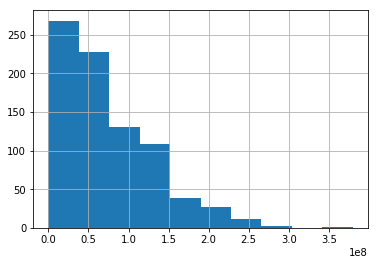

In [47]:
df.budget.hist();

As you can see the histogram clearly depicts that most movies are on the lower end of the budget spectrum. It kinda makes sense so they can generate more profit.

### Research Question 2  - Which movie has the most revenue? Did it translate to profits?

In [32]:
maxN('revenue')

,profit,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
1386,2544505847,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Enter the World of Pandora.,162,Action|Adventure|Fantasy|Science Fiction,12/10/09,2009


In [33]:
maxN('profit')

,profit,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
1386,2544505847,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Enter the World of Pandora.,162,Action|Adventure|Fantasy|Science Fiction,12/10/09,2009


I'm seeing a good correlation with revenue and profits, let us check more.

correlation : (0.64842309091049222, 3.6923850924924812e-98)


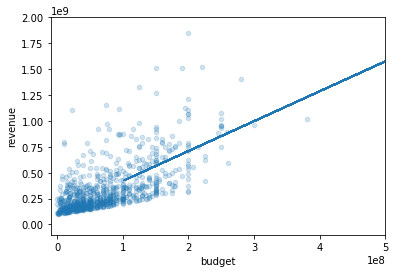

In [61]:
import statsmodels.api as sm
import scipy

model = sm.OLS(df.revenue, sm.add_constant(df.budget))
p = model.fit().params

x = df.revenue

ax = df.plot(x='budget', y='revenue', kind='scatter', alpha=0.2)

ax.plot(x, p.const + p.budget* x)
ax.set_xlim([-10000000, 500000000])
ax.set_ylim([-100000000, 2000000000])

print ('correlation :', scipy.stats.pearsonr(df.budget, df.revenue))

Thats a good and strong correlation there as you can see in the scatterplot. 

### Research Question 3 - Is there a certain actor/actress that is starring in profitable movies?

In order to get our answer here, I would need to separate the values and pass it as a series then we can tally the results. It's going to be a lot of names so I will just take the top 10.

In [53]:
cast = pd.Series(df.cast.str.split('|').sum()).value_counts()

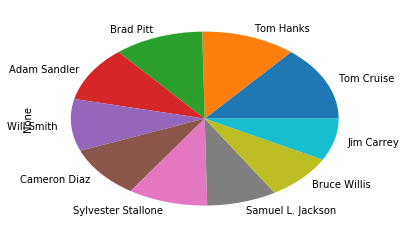

In [57]:
cast.head(10).plot(kind='pie');

In [55]:
cast.describe()

count    1997.000000
mean        2.035553
std         2.093562
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        23.000000
dtype: float64

Tom Cruise is leading the way for actors and Cameron Diaz for actresses. It's safe to say that if you put any of these people in your movie, you have a shot of making it a box office hit. Just look at that 75% of the actors and actresses are just in 1 or 2 profitable movies while Tom Cruise has a whopping 23.

### Research Question 4 - Is there a certain director that has directed more profitable movies compared to others?

Will it be the same for actors to have a close tally? Let's see.

In [58]:
bestDirector = df['director'].value_counts()

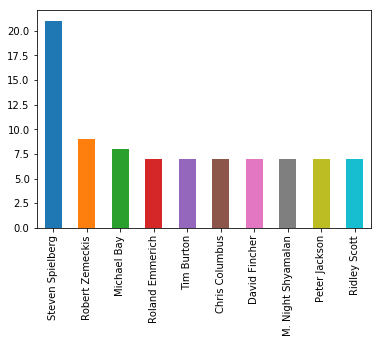

In [59]:
bestDirector.head(10).plot(kind='bar');

In [60]:
bestDirector.describe()

count    431.000000
mean       1.886311
std        1.685388
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       21.000000
Name: director, dtype: float64

Whoa! That's a pretty impressive record for Mr.Spielberg right there.

### Research Question 5 - How long should the movie be? Is the longest movie more profitable? 

I am going to use a histogram to see the distribution of the runtimes in the movies. 

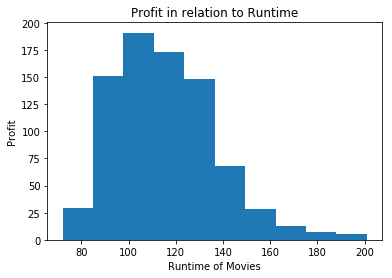

In [47]:
plt.xlabel ('Runtime of Movies')

plt.ylabel ('Profit')

plt.title ('Profit in relation to Runtime')

plt.hist(df['runtime'])

plt.show()

In [50]:
df.runtime.describe()

count    813.000000
mean     115.496925
std       21.320717
min       72.000000
25%       99.000000
50%      113.000000
75%      128.000000
max      201.000000
Name: runtime, dtype: float64

As you can see, not because the movie is long. It's going to be a hit. From our histogram, the sweet spot is around 100 - 110 mins as those are the ones that has the most profit followed by 90 - 130 then it is just a steep decline from there. Those values are shown in the table above, almost 75% of the movies are in the 128 range. 

### Research Question 6 - Is there a certain genre that outperforms the rest?

I am going to use the same process I did when I did a tally of the actors and actress with genres.

In [49]:
genres = pd.Series(df.genres.str.split('|').sum()).value_counts()

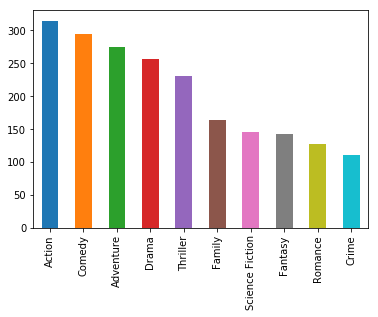

In [51]:
genres.head(10).plot(kind='bar');

From action, comedy, adventure, drama, thriller it's pretty close but action takes the prize here. 

### Research Question 7 - Overall which movie earned the most?

Let's see who is the big winner of all time so far.

In [52]:
maxN('profit')

,profit,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
1386,2544505847,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Enter the World of Pandora.,162,Action|Adventure|Fantasy|Science Fiction,12/10/09,2009


Enter the world of Pandora, it's Avatar! 

<a id='conclusions'></a>
## Conclusions

    What did we learn from our dataset?
    
        1. Budget doesn't mean profits most of the time.
        2. Revenue is strongly correlated with profits.
        3. Tom Cruise and Cameron Diaz are the leading the actors and actresses when it comes to profitable movies.
        4. Hiring Steve Spielberg to direct your movie improves your chances of making a hit.
        5. Longest runtime doesn't mean success. You have to aim for the sweet spot, I guess noone likes to sit for more 
           than 3 hours in a movie theater. 
        6. The action and comedy genre are in a tight match for which genre is the most profitable.

### Limitation
    
    1. Within the genre, it is really hard to say who is the clear winner as 1 movie can technically be in a lot of genre, 
       e.g Avatar is in both Action and Adventure genre. 
    2. I specifically used the 100M mark, it could've skewed my results favorable to some. 
    3. For the actors and actresses, I wasn't able to group them based on the number of films they have made. For example, 
       Tom Cruise could've made twice the amount of movies compared to Sylvester Stallone thus getting a higher chance to be 
       in movie that is profitable.
    



### References

I mainly used these resources:
    - Stackoverflow
    - pandas reference
    - the cheat sheet provided in the previous lesson
    - w3schools

In [62]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0